#  2020AIML544 - UNSUPERVISED LEARNING - MINI PROJECT 2

## Overall Approach

### TASKS PERFORMED FOR PART 1:
    1. READ THE TEXT DATA FROM EXCEL FILE INTO A DATAFRAME  
    2. REMOVE STOP WORDS IN THE TEXT DATA
    3. REMOVE SPECIAL CHARACTERS FROM THE TEXT DATA
    4. CONVERT THE TEXT TO LOWER CASE
    5. REMOVE URLS IF PRESENT IN THE DATA
    6. CONVERT THE TEXT TO CORRESPONDING TF-IDF VECTOR

### TASKS PERFORMED FOR PART 2:
    1. FIND ASSOCIATION RULES WITH GIVEN PARAMETERS
    2. INTERPRET ONE OF ASSOCIATION RULES
    3. PLOT LINE GRAPH FOR CONFIDENCE PERCENTAGE AND NUMBER OF ASSOCIATION RULES
    4. TRIED TO FIND ASSOCIATION RULES USING TOKENIZED DATA INSTEAD OF VECTORIZED

#### Import all needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import io
import nltk

from pandas import DataFrame
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### <span style='background : yellow' > **TASK 1:**</span> DATA PREPROCESSING 

#### Read the input excel file into a dataframe

In [2]:
file_path = r"C:\Users\Aspire V3-572\problem_statement_data.CSV"
df = pd.read_csv(file_path, header = 0, encoding='cp1252')

#### Display information about the dataframe using head function

In [3]:
df.head()

,headline
0,$MMM fell on hard times but could be set to rebound soon.
1,Wolfe Research Upgrades 3M $MMM to Á¤Peer PerformÁ¬
2,3M $MMM Upgraded to Á¤Peer PerformÁ¬ by Wolfe Research #stocks
3,$MMM #insideday follow up as it also opened up with a nice candle that closed just over the prior day's high and thÁK
4,$MMM is best #dividend #stock out there and down 40% in 2019 $XLI go go please


In [4]:
df.shape

(9470, 1)

In [5]:
stop = stopwords.words('english')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### REMOVE STOP WORDS FROM THE TEXT DATA

In [6]:
for i in stop :
    df = df.replace(to_replace=r'\b%s\b'%i, value="",regex=True)
df.head()

,headline
0,$MMM fell hard times could set rebound soon.
1,Wolfe Research Upgrades 3M $MMM Á¤Peer PerformÁ¬
2,3M $MMM Upgraded Á¤Peer PerformÁ¬ Wolfe Research #stocks
3,$MMM #insideday follow also opened nice candle closed prior day' high thÁK
4,$MMM best #dividend #stock 40% 2019 $XLI go go please


#### REMOVE SPECIAL CHARACTERS FROM THE TEXT DATA

In [7]:
df1 = df.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
df1.head()

,headline
0,MMM fell hard times could set rebound soon
1,Wolfe Research Upgrades 3M MMM Peer Perform
2,3M MMM Upgraded Peer Perform Wolfe Research stocks
3,MMM insideday follow also opened nice candle closed prior day high thK
4,MMM best dividend stock 40 2019 XLI go go please


#### CONVERT TEXT TO LOWER CASE

In [8]:
df2 = df1.applymap(lambda s:s.lower() if type(s) == str else s)
df2.head()

,headline
0,mmm fell hard times could set rebound soon
1,wolfe research upgrades 3m mmm peer perform
2,3m mmm upgraded peer perform wolfe research stocks
3,mmm insideday follow also opened nice candle closed prior day high thk
4,mmm best dividend stock 40 2019 xli go go please


#### REMOVE ANY WEBSITE URLs FROM THE TEXT DATA

In [9]:
df3 = df2.replace(r"http\S+", "")
df3.head()

,headline
0,mmm fell hard times could set rebound soon
1,wolfe research upgrades 3m mmm peer perform
2,3m mmm upgraded peer perform wolfe research stocks
3,mmm insideday follow also opened nice candle closed prior day high thk
4,mmm best dividend stock 40 2019 xli go go please


#### FOR EACH TITLE TEXT, CONVERT IT INTO A CORRESPONDING TF-IDF VECTOR

In [10]:
vectorizer = TfidfVectorizer(max_df=.65, min_df=1, norm=None)
X = vectorizer.fit_transform(df3['headline'])

In [11]:
print('vocabulary:',vectorizer.vocabulary_)
print('idf_',vectorizer.idf_)
print('X',X)

vocabulary: {'mmm': 7809, 'fell': 5540, 'hard': 6191, 'times': 10833, 'could': 4372, 'set': 9822, 'rebound': 9210, 'soon': 10114, 'wolfe': 11685, 'research': 9364, 'upgrades': 11226, '3m': 1666, 'peer': 8577, 'perform': 8612, 'upgraded': 11223, 'stocks': 10344, 'insideday': 6682, 'follow': 5695, 'also': 2801, 'opened': 8328, 'nice': 8106, 'candle': 3786, 'closed': 4103, 'prior': 8921, 'day': 4580, 'high': 6304, 'thk': 10774, 'best': 3358, 'dividend': 4837, 'stock': 10329, '40': 1675, '2019': 999, 'xli': 11773, 'go': 5996, 'please': 8761, 'the': 10719, 'fallen': 5462, 'king': 7020, 'will': 11620, 'be': 3280, 'back': 3175, 'read': 9182, 'sign': 9942, 'updates': 11217, 'trading': 10964, 'economy': 5062, 'investing': 6750, 'mmmcelebrates': 7810, 'new': 8074, 'year': 11816, 'month': 7873, 'close': 4101, 'volume': 11398, 'longterm': 7334, 'supportresistance': 10487, 'flag': 5643, '3mk': 1668, '180': 819, 'baby': 3168, 'going': 6008, 'higher': 6307, 'mmmhasn': 7812, 'really': 9201, 'done': 48

In [12]:
# convert the vector transformed document into an array
X_array=X.toarray()
len(X_array)

9470

In [13]:
#print term & corresponding tf-idf scores: tf idf score is higher if the term appears fewer no of times

# loop each item in transformed array, using enumerate to keep track of the current position
for counter, doc in enumerate(X_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)

one_doc_as_df.head(10)

,term,score
0,helpers,9.462843
1,robot,9.462843
2,thousands,8.364230
3,stores,7.671083
4,add,7.516932
5,plans,6.112939
6,us,5.288455
7,walmart,4.692158
8,wmt,4.347847
9,msdc,0.000000


### <span style='background : yellow' > **TASK 2:**</span> Consider the pre-processed text of all the sentences and find words that frequently occur together.

In [14]:
from apyori import apriori

In [15]:
records = []
for i in range(0, 9470):
    records.append([str(df3['headline'].values[i])])

print(records)

[['mmm fell  hard times  could  set  rebound soon  '], ['wolfe research upgrades 3m mmm  peer perform '], ['3m mmm upgraded  peer perform  wolfe research  stocks'], ['mmm insideday follow    also opened    nice candle  closed    prior day high  thk '], ['mmm  best dividend stock     40  2019 xli go go please '], ['mmm  3m the fallen dividend king will be back read   sign   updates  trading economy investing'], ['mmmcelebrates new year  7 month high close  volume   longterm supportresistance  5 day flag 3mk '], ['mmm  180 baby  going higher '], ['mmmhasn really done much  year   looks like  series  higher highs forming   recent close abk '], ['3m mmm rating increased  neutral  jpmorgan chase  co '], ['3m mmm stock rating upgraded  jpmorgan chase  co '], ['3m mmm upgraded  neutral  jpmorgan chase  co '], ['mmm higher higher  move   long term supportresistance line  200ma  heavy volume  2nd day  breakk '], ['highlight mmm  one   bestperforming dow stocks scottgamm says  jp morgan upgraded

### 2 a) FIND ASSOCIATION RULES OF MINIMUM LENGTH 2 WITH 20% CONFIDENCE AND 10% SUPPORT 

#### <span style='background : yellow' > **Observation:**</span> Got 20 rules with given parameters and min lift = 1 out of which 4 rules are with 1 term and rest of the 16 rules are having mininum 2 terms 

In [16]:
association_rules = apriori(X_array, min_support=0.1, min_confidence=0.2, min_lift=1, min_length=2)
association_results = list(association_rules)

In [17]:
print(len(association_results))

20


#### PRINT THE 20 ASSOCIATION RULES

In [18]:
i = 0
for item in association_results:
    i = i+1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: ", i, "" + " -> " + str(items))

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule:  1  -> [0.0]
Support: 1.0
Confidence: 1.0
Lift: 1.0
Rule:  2  -> [8.76969541610621]
Support: 0.21140443505807816
Confidence: 0.21140443505807816
Lift: 1.0
Rule:  3  -> [9.057377488557991]
Support: 0.270960929250264
Confidence: 0.270960929250264
Lift: 1.0
Rule:  4  -> [9.462842596666157]
Support: 0.3726504751847941
Confidence: 0.3726504751847941
Lift: 1.0
Rule:  5  -> [0.0, 2.8447713928064733]
Support: 0.15786694825765576
Confidence: 1.0
Lift: 1.0
Rule:  6  -> [0.0, 3.074281191120526]
Support: 0.12544878563885956
Confidence: 1.0
Lift: 1.0
Rule:  7  -> [0.0, 3.124248518462973]
Support: 0.11763463569165787
Confidence: 1.0
Lift: 1.0
Rule:  8  -> [0.0, 3.2206193312109908]
Support: 0.10823653643083421
Confidence: 1.0
Lift: 1.0
Rule:  9  -> [0.0, 7.958765199889882]
Support: 0.10337909186906019
Confidence: 1.0
Lift: 1.0
Rule:  10  -> [0.0, 8.076548235546266]
Support: 0.12111932418162619
Confidence: 1.0
Lift: 1.0
Rule:  11  -> [0.0, 8.210079628170789]
Support: 0.117740232312566
Confidence

In [19]:
print(association_results[17])

RelationRecord(items=frozenset({9.057377488557991, 9.462842596666157}), support=0.14920802534318903, ordered_statistics=[OrderedStatistic(items_base=frozenset({9.057377488557991}), items_add=frozenset({9.462842596666157}), confidence=0.5506625097427904, lift=1.477691688088474), OrderedStatistic(items_base=frozenset({9.462842596666157}), items_add=frozenset({9.057377488557991}), confidence=0.40039671294984414, lift=1.4776916880884738)])


#### <span style='background : yellow' > **Interpretation of rule 18:**</span> The support value for the 18th rule is 0.1492, The confidence level for the rule is 0.5506 which shows that out of all the records that contain first term (with tf idf score of 9.057377488557991), 55.06% of the records also contain the 2nd term (with tfi df score of 9.462842596666157).  Finally, the lift of 1.477 tells us that term 2 is 1.477 times more likely to occur in a record along with term 1.

#### Association rule mining algorithms such as Apriori are very useful for finding simple associations between our data items. They are easy to implement and have high explain-ability

In [20]:
Rules = {10:[],20:[],50:[]}
Confidence =[0,10,20,30,40,50,60,70,80,90,100]
Support =[10,20,50]
for i in Confidence:
    for j in Support:
#         print('Confidence,Support', i,j)
        association_rules = apriori(X_array, min_support=(j/100), min_confidence=(i/100), min_lift=1, min_length=2)
        Rules[j].append(len(list(association_rules)))
Rules

{10: [29, 29, 20, 18, 17, 17, 15, 15, 15, 15, 15],
 20: [7, 7, 7, 5, 4, 4, 4, 4, 4, 4, 4],
 50: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

### 2 b) Draw a line graph with Y-axis as a number of association rules of minimum length 2, and X-axis as confidence percentage. Plot different colored lines for different support percentage

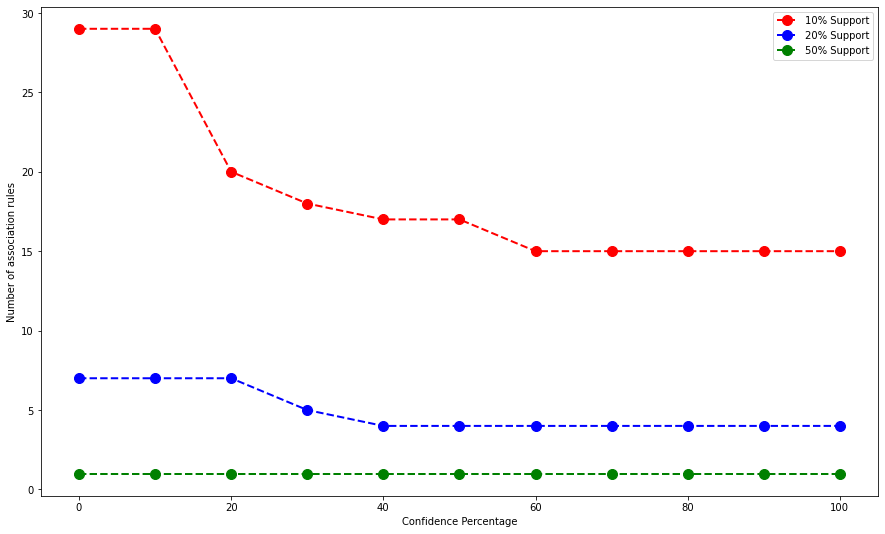

In [21]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.xlabel('Confidence Percentage')
plt.ylabel('Number of association rules')

plt.plot(Confidence,Rules[10],color='red', marker='o', linestyle='dashed',
         linewidth=2, markersize=10,label='10% Support')
plt.plot(Confidence,Rules[20],color='blue', marker='o', linestyle='dashed',
         linewidth=2, markersize=10,label='20% Support')
plt.plot(Confidence,Rules[50],color='green', marker='o', linestyle='dashed',
         linewidth=2, markersize=10,label='50% Support')

plt.legend()
plt.show()

#### The above association rules were formed using TF-IDF vector but it is difficult to interpret which terms are having good association hence I am trying to run apriori with pre-processed df after tokenization. 

#### TOKENIZE THE PRE-PROCESSED DATA

In [22]:
from nltk.tokenize import word_tokenize
df4 = df3['headline'].apply(word_tokenize)
df4

0                                                                           [mmm, fell, hard, times, could, set, rebound, soon]
1                                                                           [wolfe, research, upgrades, 3m, mmm, peer, perform]
2                                                                   , mmm, upgraded, peer, perform, wolfe, research, stocks]
3                                           [mmm, insideday, follow, also, opened, nice, candle, closed, prior, day, high, thk]
4                                                                   [mmm, best, dividend, stock, 40, 2019, xli, go, go, please]
                                                                 ...                                                           
9465                                                                        [wmt, walmart, shifts, remodeling, vs, new, stores]
9466    [walmart, inc, wmt, holder, texas, permanent, school, fund, has, trimmed, its, stake, 333, million,

#### RUN APRIORI WITH TOKENIZED DATA

In [23]:
df4_array = df4.to_numpy()
from apyori import apriori
association_rules = apriori(df4_array, min_support=0.1, min_confidence=0.2, min_lift=0.2, min_length=2)
association_results = list(association_rules)
print(len(association_results))

0


#### With 10% min_support & 20% min_confidence, did not get any association rules
#### Hhence tried with 1% min_support & 20% min_confidence. Got 284 rules with 1% min_support as below.

In [24]:
df4_array = df4.to_numpy()
from apyori import apriori
association_rules = apriori(df4_array, min_support=0.01, min_confidence=0.2, min_lift=0.2, min_length=2)
association_results = list(association_rules)
print(len(association_results))

284


#### PRINT THE 284 ASSOCIATION RULES

In [25]:
i = 0
for item in association_results:
    i = i+1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: ", i, "" + " -> " + str(items))

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule:  1  -> ['earnings', '2019']
Support: 0.01246040126715945
Confidence: 0.4645669291338582
Lift: 4.8452079503277945
Rule:  2  -> ['eps', '2019']
Support: 0.012249208025343189
Confidence: 0.45669291338582674
Lift: 7.921029102131464
Rule:  3  -> ['2019', 'estimates']
Support: 0.011826821541710665
Confidence: 0.4409448818897638
Lift: 11.017804832443437
Rule:  4  -> ['3m', 'co']
Support: 0.011721224920802534
Confidence: 0.3936170212765957
Lift: 3.2958029986643336
Rule:  5  -> ['3m', 'mmm']
Support: 0.029672650475184793
Confidence: 0.9964539007092198
Lift: 26.656549264735343
Rule:  6  -> ['apple', 'aapl']
Support: 0.012882787750791975
Confidence: 0.31853785900783294
Lift: 21.393996629816865
Rule:  7  -> ['alliance', 'boots']
Support: 0.023231256599788808
Confidence: 0.9865470852017937
Lift: 40.9763197230745
Rule:  8  -> ['alliance', 'walgreens']
Support: 0.0235480464625132
Confidence: 1.0
Lift: 37.28346456692913
Rule:  9  -> ['alliance', 'wba']
Support: 0.023336853220696938
Confidence: 0

#### In the above rules for example in rule 19, we can see that the terms <span style='background : yellow' > 'walgreens' & 'boots' </span> has support of 2.4% and confidence is 100% so we can say that these 2 terms are most co-occuring. 
#### This way, we can interpret which terms are most co-occuring. However the above rules were with min support of 1% instead of 10% asked in the question.